In [1]:
import fiona
import folium
import numpy as np
import json

# from pyproj import Proj, transform
from pyproj import Transformer

transformer = Transformer.from_crs(4326, 3096)


In [2]:
cm = [36.488944, 139.907611]
c = transformer.transform(cm[0], cm[1])
print(c)





(-135383.66762975452, 4060872.219492063)


In [10]:
shape = fiona.open("/home/djordje/data/osm_honda/gis_osm_roads_free_1.shp")
# print(shape.schema) 
first = shape.next()
# print(first) # (GeoJSON format)
roads = []
i = 0
for el in shape:
    geometry = el['geometry']['coordinates']
    include = False
    for point in geometry:
        dd = transformer.transform(point[1], point[0])
        d = np.array(dd)
        l = np.linalg.norm(c-d)
        if l < 3000:
            include = True
            break
    if include:
        roads.append(el)
    i += 1
    if i%10000 == 0:
        print(i, len(roads))


<ipython-input-10-5db88fc18afb>:3: FionaDeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
  first = shape.next()


10000 0
20000 0
30000 0
40000 1
50000 21
60000 21
70000 26
80000 26
90000 26
100000 26
110000 26
120000 59
130000 59
140000 75
150000 75
160000 75
170000 75
180000 75
190000 87
200000 87
210000 87
220000 87
230000 87
240000 87
250000 87
260000 87
270000 87
280000 132
290000 132
300000 132
310000 132
320000 132
330000 132
340000 132
350000 132
360000 132
370000 132
380000 132
390000 132
400000 132
410000 132
420000 132
430000 132
440000 132
450000 132
460000 132
470000 132
480000 132
490000 132
500000 132
510000 132
520000 132
530000 248
540000 655
550000 655
560000 655
570000 655
580000 655
590000 655
600000 655
610000 655
620000 655
630000 655
640000 655
650000 655
660000 655
670000 655
680000 943
690000 943
700000 943
710000 943
720000 943
730000 943
740000 943
750000 943
760000 1057
770000 1108
780000 1145
790000 1145
800000 1145
810000 1145
820000 1145
830000 1145
840000 1145
850000 1145
860000 1145
870000 1145
880000 1145
890000 1145
900000 1157
910000 1157
920000 1157
930000 1157

In [11]:
m = folium.Map(
    zoom_start=18,
    location=cm
)

for road in roads:
    geometry = road['geometry']['coordinates']
    ggeometry = []
    for el in geometry:
        ggeometry.append([el[1], el[0]])

    folium.PolyLine(
        ggeometry, color='green', width=2, weight=2.5, opacity=1
    ).add_to(m)


In [12]:
m

In [8]:
for road in roads[:2]:
    print(road)

{'type': 'Feature', 'id': '47529', 'properties': OrderedDict([('osm_id', '48802829'), ('code', 5112), ('fclass', 'trunk'), ('name', None), ('ref', '4'), ('oneway', 'F'), ('maxspeed', 0), ('layer', 0), ('bridge', 'F'), ('tunnel', 'F')]), 'geometry': {'type': 'LineString', 'coordinates': [(139.9124535, 36.492014), (139.912679, 36.4925148), (139.9137331, 36.4943696), (139.9144851, 36.4955839), (139.9150674, 36.4966086), (139.9155781, 36.4976437), (139.915777, 36.4981236), (139.91595, 36.4985698), (139.9163092, 36.4995282), (139.9165388, 36.5003605), (139.9167116, 36.5011269), (139.9167414, 36.5013876)]}}
{'type': 'Feature', 'id': '47532', 'properties': OrderedDict([('osm_id', '48802832'), ('code', 5112), ('fclass', 'trunk'), ('name', 'ç\x9f³æ©\x8bå®\x87é\x83½å®®ã\x83\x90ã\x82¤ã\x83\x91ã\x82¹'), ('ref', '4'), ('oneway', 'F'), ('maxspeed', 0), ('layer', 1), ('bridge', 'T'), ('tunnel', 'F')]), 'geometry': {'type': 'LineString', 'coordinates': [(139.914146, 36.4947545), (139.9142858, 36.49496

In [13]:
with open('japan_3k.json', 'w') as file:
    json.dump(roads, file)

In [14]:
rroads = []
with open('japan_3k.json') as file:
    rroads = json.load(file)

In [15]:
m = folium.Map(
    zoom_start=18,
    location=cm
)

for road in rroads:
    geometry = road['geometry']['coordinates']
    ggeometry = []
    for el in geometry:
        ggeometry.append([el[1], el[0]])

    folium.PolyLine(
        ggeometry, color='green', width=2, weight=2.5, opacity=1
    ).add_to(m)
m

In [49]:
def get_value(str):
    parts = str.split(':')
    return float(parts[1])

data = []

i = 0
with open('data/20-11-06_07-41-48_NA_NA_CZ_D_CL_UR_0003.csv') as file:
    for line in file:
        parts = line[:-1].split(',')
#         print(parts)
        if i>0:
            frameID = int(parts[0])
            speed = float(parts[1])*(1000/3600) # m/s
            sa = float(parts[2])
            yaw = float(parts[3])
            data.append([frameID, yaw, speed, sa])
        i += 1

# i = 0
# with open('data/20-11-06_07-41-48_NA_NA_CZ_D_CL_UR_0004.csv') as file:
#     for line in file:
#         parts = line[:-1].split(',')
# #         print(parts)
#         if i>0:
#             frameID = int(parts[0])
#             speed = float(parts[1])*(1000/3600) # m/s
#             sa = float(parts[2])
#             yaw = float(parts[3])
#             data.append([frameID, yaw, speed, sa])
#         i += 1        
        
        
        

In [50]:
path = 0
t = 0
delta_t = 1.0/36 # s
tt = []
ss = []
sp = []
for idx, el in enumerate(data):
    frameID = el[0]
    speed = el[2]
    sa = el[3]
    yaw = el[1]
    d = speed*delta_t
    path += d
    tt.append(t)
    ss.append(sa)
    sp.append(speed*3600/1000)
    t += delta_t
    
    print("{}\t{:2.3f}\t{:2.3f}\t{:2.3f}\t{:2.3f}".format(idx, t, speed, d, path))


0	0.028	0.000	0.000	0.000
1	0.056	0.000	0.000	0.000
2	0.083	0.000	0.000	0.000
3	0.111	0.000	0.000	0.000
4	0.139	0.000	0.000	0.000
5	0.167	0.000	0.000	0.000
6	0.194	0.000	0.000	0.000
7	0.222	0.000	0.000	0.000
8	0.250	0.000	0.000	0.000
9	0.278	0.000	0.000	0.000
10	0.306	0.000	0.000	0.000
11	0.333	0.000	0.000	0.000
12	0.361	0.000	0.000	0.000
13	0.389	0.000	0.000	0.000
14	0.417	0.000	0.000	0.000
15	0.444	0.000	0.000	0.000
16	0.472	0.000	0.000	0.000
17	0.500	0.000	0.000	0.000
18	0.528	0.000	0.000	0.000
19	0.556	0.000	0.000	0.000
20	0.583	0.000	0.000	0.000
21	0.611	0.000	0.000	0.000
22	0.639	0.000	0.000	0.000
23	0.667	0.000	0.000	0.000
24	0.694	0.000	0.000	0.000
25	0.722	0.000	0.000	0.000
26	0.750	0.000	0.000	0.000
27	0.778	0.000	0.000	0.000
28	0.806	0.000	0.000	0.000
29	0.833	0.000	0.000	0.000
30	0.861	0.000	0.000	0.000
31	0.889	0.000	0.000	0.000
32	0.917	0.000	0.000	0.000
33	0.944	0.000	0.000	0.000
34	0.972	0.000	0.000	0.000
35	1.000	0.000	0.000	0.000
36	1.028	0.560	0.016	0.016
37	1.056	0.

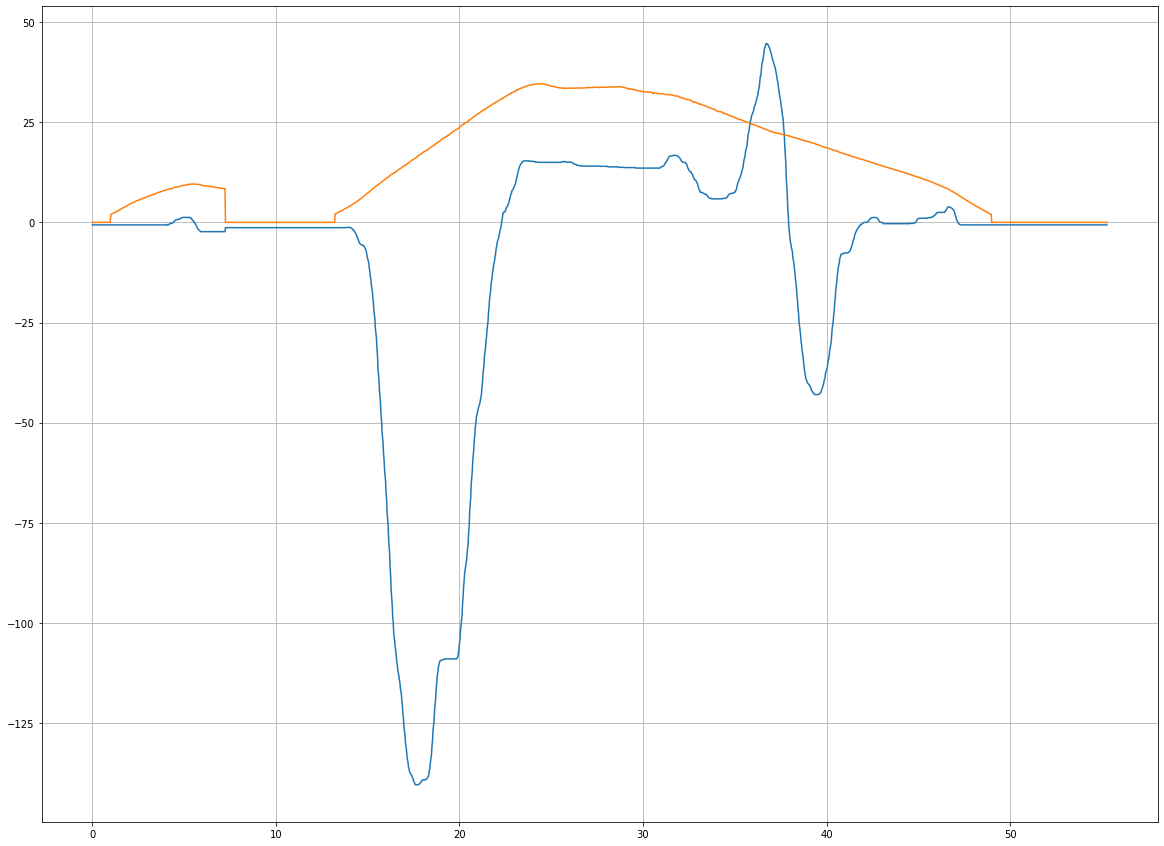

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
plt.grid()
plt.plot(tt, ss)
plt.plot(tt, sp)

plt.show()